In [14]:
import pandas as pd
import numpy as np 
import math
from sklearn.linear_model import LinearRegression

In [15]:
df=pd.read_csv("C:\\Users\\dell\\OneDrive\\Desktop\\homeprice.csv")

In [16]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


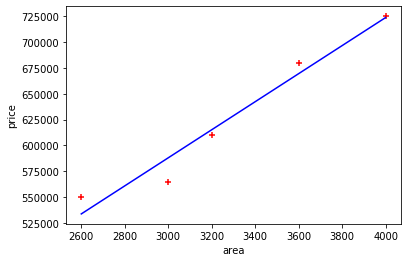

In [22]:
import matplotlib.pyplot as plt
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area,df.price,marker='+',color='red')
plt.plot(df.area,r.predict(df[["area"]]),color='blue')

In [18]:
r=LinearRegression()

In [19]:
r

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
model=r.fit(df[['area']],df.price)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
model.predict([[3300]])

array([628715.75342466])

In [25]:
df_n=pd.read_csv("C:\\Users\\dell\\OneDrive\\Desktop\\area.csv")

In [26]:
df_n

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [27]:
price=model.predict(df_n[["area"]])
price

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [28]:
df_n["price"]=price
df_n

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [ ]:
df_n.to_csv("predection.csv",index=False)

In [29]:
model.predict([[5000]])

array([859554.79452055])

In [30]:
model.intercept_

180616.43835616432

In [31]:
model.coef_

array([135.78767123])

In [32]:
df_can=pd.read_csv("C:\\Users\\dell\\OneDrive\\Desktop\\canadaincome.csv")
df_can

,year,percapitaincome
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [33]:
reg=LinearRegression()
model2=reg.fit(df_can[['year']],df_can.percapitaincome)
model2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

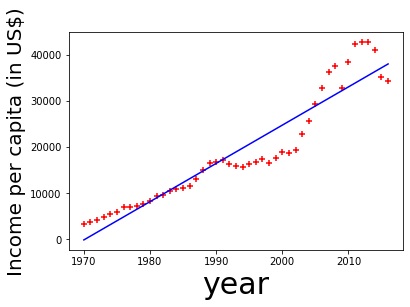

In [34]:
import matplotlib.pyplot as plt
plt.xlabel("year",fontsize=30)
plt.ylabel("Income per capita (in US$)",fontsize=20)
plt.scatter(df_can.year,df_can.percapitaincome,marker='+',color='red')
plt.plot(df_can.year,reg.predict(df_can[["year"]]),color='blue')

In [35]:
model2.predict([[2020]])

array([41288.69409442])

In [36]:
model2.score(df_can[["year"]],df_can[["percapitaincome"]])

0.890916917957032

# storing model

## Pickle to serialize the python object into a file 

In [37]:
import pickle

In [42]:
with open ("Smodel","wb") as file:
    pickle.dump(model,file)

### load save model

In [43]:
with open("Smodel","rb") as file:
    mb=pickle.load(file)

In [45]:
mb.coef_

array([135.78767123])

In [46]:
mb.intercept_

180616.43835616432

In [48]:
mb.predict([[3000]])

array([587979.45205479])

## save model using joblib

In [50]:
from sklearn.externals import joblib

In [55]:
joblib.dump(model2,"model_joblib")

['model_joblib']

In [56]:
mj=joblib.load("model_joblib")
mj

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
mj.coef_

array([828.46507522])

In [60]:
mj.intercept_

-1632210.7578554575

In [59]:
mj.predict([[2025]])

array([45431.01947053])